# Gerekli Kütüphanelerin İçe Aktarımı

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Makine Öğrenmesi Paketleri

In [ ]:


from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Veri Kümesinin Okunması ve Görüntülenmesi

In [ ]:
data=pd.read_excel('/content/side_effect_data 1.xlsx')

In [ ]:


data.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


# Veri Kümesinin şeklini Bulma

In [ ]:
data.shape

(2357, 19)

# Temel bilgiler

In [ ]:


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

# Sayısal özelliklerin seçilmesi

In [ ]:

numerical_data = data.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['Kullanici_id', 'Kilo', 'Boy']


# İstatistiksel Özet

In [ ]:

data.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


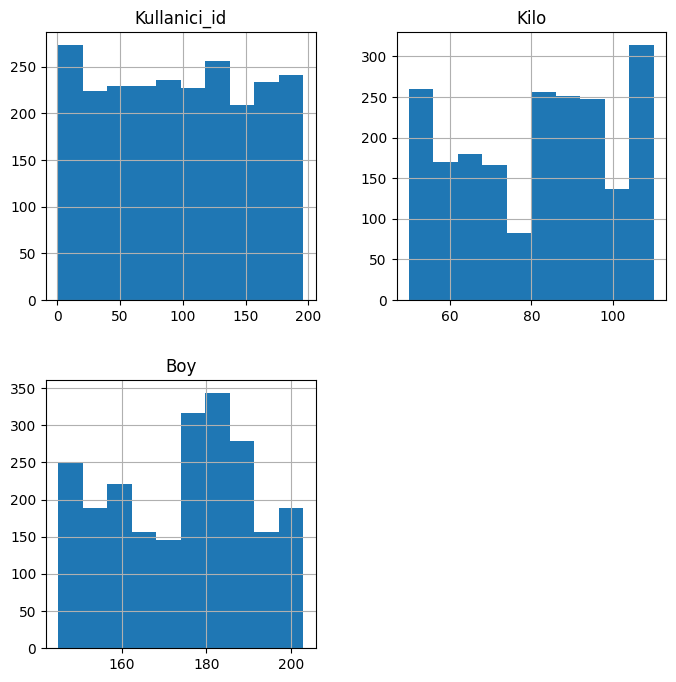

In [ ]:
numerical_data.hist(figsize=(8,8))
plt.show()

In [ ]:
numerical_data.nunique()

,0
Kullanici_id,196
Kilo,56
Boy,41


# Kategorik özelliklerin seçilmesi

In [ ]:
categorical_data=data.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 12 categorical features: 

['Cinsiyet', 'Uyruk', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim', 'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu']


# Kategorik özelliklerin özet satistikleri

In [ ]:
categorical_data.describe(include='object')

,Cinsiyet,Uyruk,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu
count,1579,2357,2130,2357,2357,1873,1965,2201,2140,2260,2236,2010
unique,2,1,13,151,22,28,80,92,84,85,90,8
top,Female,Turkiye,Adana,chlordiazepoxide-amitriptyline,Agizda Farkli Bir Tat,Domates,"Alzheimer, Diger","Alzheimer, Diyabet","Alzheimer, Astim",,,AB RH-
freq,872,2357,220,29,229,118,61,64,110,168,136,421


# Plotting a count plot on 'Cinsiyet'

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

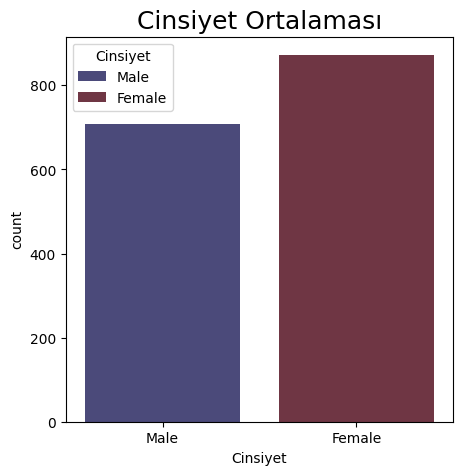

In [ ]:
data['Cinsiyet'].value_counts()
plt.figure(figsize=(5,5))
sns.countplot(x='Cinsiyet',data=data,palette="icefire",hue='Cinsiyet')
plt.title("Cinsiyet Ortalaması",fontsize=18)
plt.xticks(rotation=0)

# Plotting a count plot on 'İL'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Canakkale'),
  Text(1, 0, 'Trabzon'),
  Text(2, 0, 'Adana'),
  Text(3, 0, 'Izmir'),
  Text(4, 0, 'Mersin'),
  Text(5, 0, 'Antalya'),
  Text(6, 0, 'Eskisehir'),
  Text(7, 0, 'Samsun'),
  Text(8, 0, 'Ankara'),
  Text(9, 0, 'Bursa'),
  Text(10, 0, 'Istanbul'),
  Text(11, 0, 'Malatya'),
  Text(12, 0, 'Kayseri')])

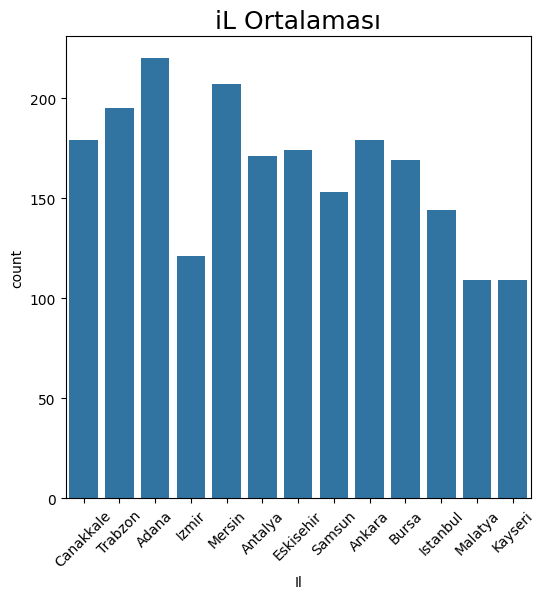

In [ ]:
data["Il"].value_counts()

plt.figure(figsize=(6,6))
sns.countplot(x='Il',data=data) #
plt.title("iL Ortalaması",fontsize=18 )
plt.xticks(rotation=45)

# Verilerdeki ilk 20 ilaç isminin sayım grafiği

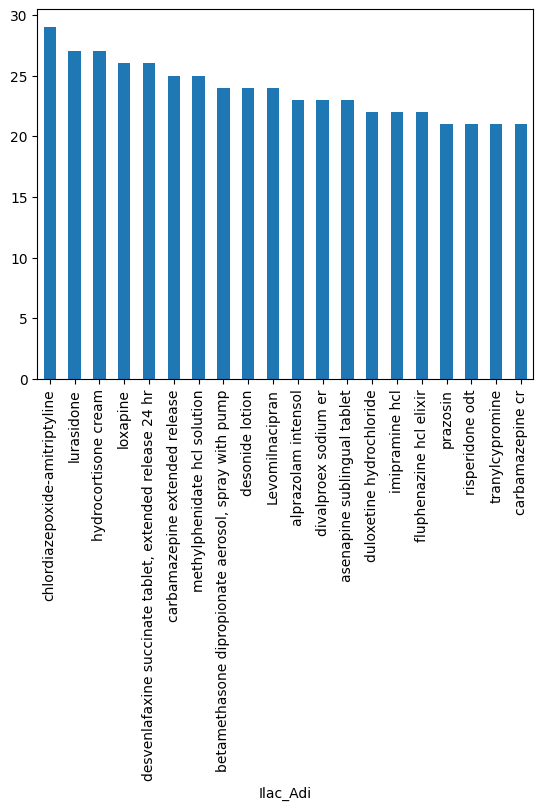

In [ ]:
data['Ilac_Adi'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [ ]:

data['Ilac_Adi'].value_counts().head(20)

,count
Ilac_Adi,
chlordiazepoxide-amitriptyline,29
lurasidone,27
hydrocortisone cream,27
loxapine,26
"desvenlafaxine succinate tablet, extended release 24 hr",26
carbamazepine extended release,25
methylphenidate hcl solution,25
"betamethasone dipropionate aerosol, spray with pump",24
desonide lotion,24


#YAN ETKİLER üzerine bir pasta grafiği çizme

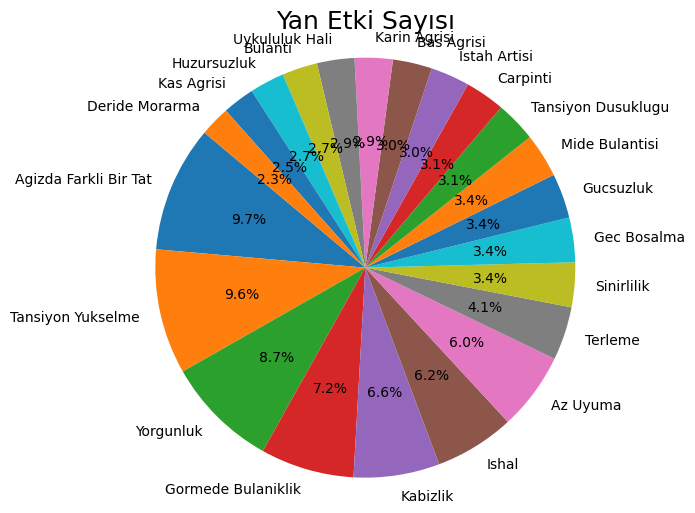

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(data['Yan_Etki'].value_counts(), labels=data['Yan_Etki'].value_counts().keys(), autopct='%1.1f%%', startangle=140)
plt.title('Yan Etki Sayısı', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.show()

In [ ]:

data.isna().sum()

,0
Kullanici_id,0
Cinsiyet,778
Dogum_Tarihi,0
Uyruk,0
Il,227
Ilac_Adi,0
Ilac_Baslangic_Tarihi,0
Ilac_Bitis_Tarihi,0
Yan_Etki,0
Yan_Etki_Bildirim_Tarihi,0


 # Her sütun için medyan değerini ayrı ayrı hesaplaması

In [ ]:
median_value_kilo = data['Kilo'].median()
median_value_boy = data['Boy'].median()


data['Kilo'].fillna(median_value_kilo, inplace=True)
data['Boy'].fillna(median_value_boy, inplace=True)

In [ ]:
mode_value = data['Cinsiyet'].mode()[0]
data['Cinsiyet'].fillna(mode_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Kullanici_id,0
Cinsiyet,0
Dogum_Tarihi,0
Uyruk,0
Il,227
Ilac_Adi,0
Ilac_Baslangic_Tarihi,0
Ilac_Bitis_Tarihi,0
Yan_Etki,0
Yan_Etki_Bildirim_Tarihi,0


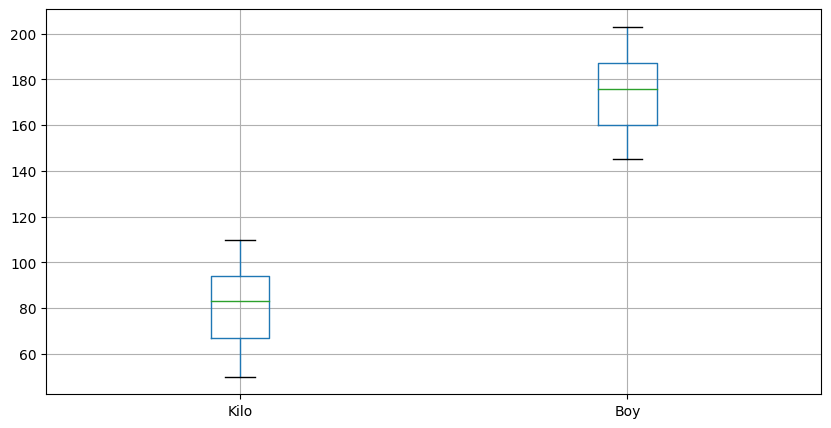

In [ ]:

graph=data.select_dtypes(include=['float64'])
graph.boxplot(figsize=(10,5))
plt.show()

In [ ]:
data=data.drop(['Kullanici_id','Dogum_Tarihi','Uyruk','Il','Ilac_Baslangic_Tarihi','Ilac_Bitis_Tarihi','Yan_Etki_Bildirim_Tarihi'],axis=1)
data.head()

,Cinsiyet,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,Male,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,Male,fluphenazine hcl,Yorgunluk,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,Female,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,Male,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,83.0,165.0
4,Female,carbamazepine extended release,Agizda Farkli Bir Tat,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:

attr = []
for i in data.columns:
    if data[i].dtype == 'object':
        attr.append(i)

for i in attr:
    data[i] = le.fit_transform(data[i])

In [ ]:

data.head()

,Cinsiyet,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,1,138,12,3,34,32,43,82,85,7,103.0,191.0
1,1,68,21,26,80,31,39,0,51,8,81.0,181.0
2,0,146,4,22,49,25,81,24,17,7,93.0,158.0
3,1,140,16,23,15,58,84,9,63,5,83.0,165.0
4,0,26,0,28,19,6,67,20,4,5,99.0,172.0


# Bir korelasyon ısı haritası çizme

<Axes: >

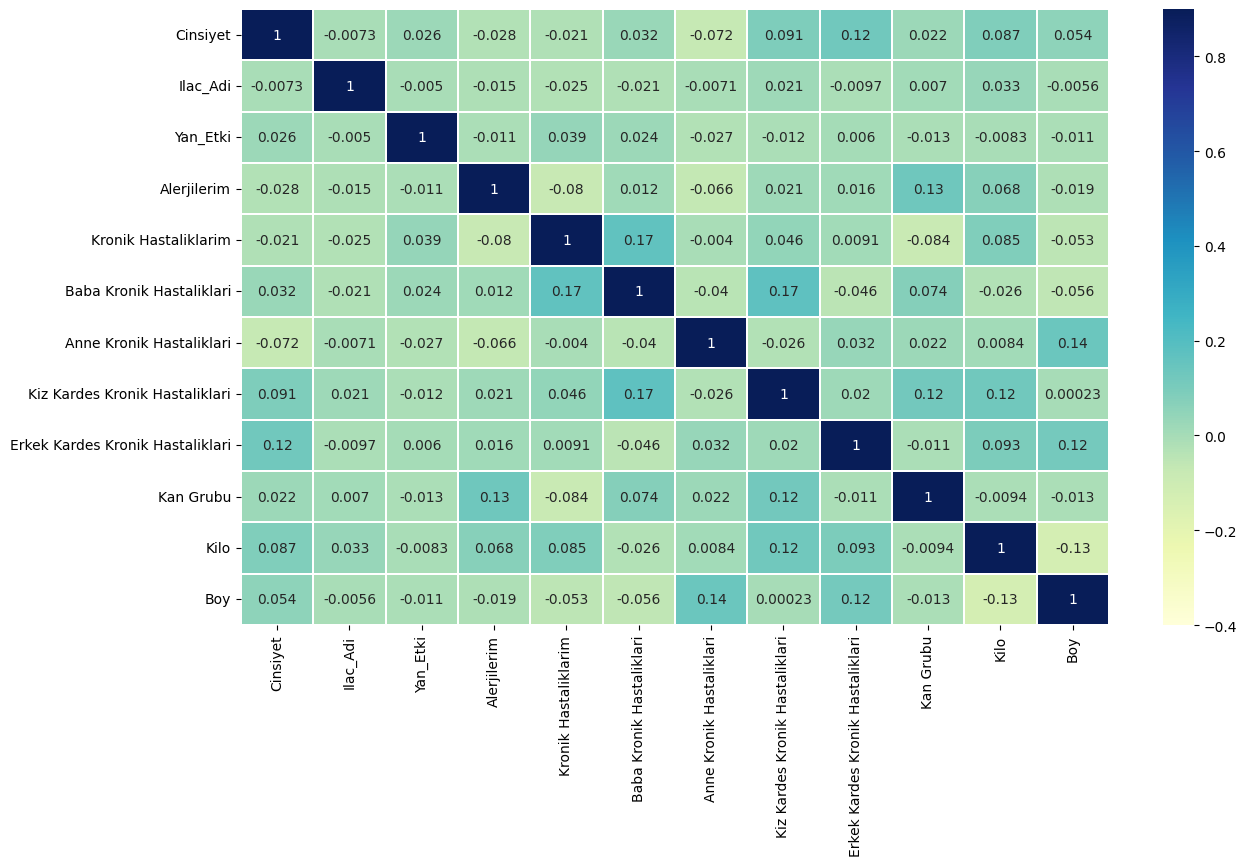

In [ ]:

corrmatrix = data.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [ ]:

x = data.drop('Yan_Etki',axis=1)

In [ ]:

y = data['Yan_Etki']

In [ ]:


from sklearn.preprocessing import MinMaxScaler

In [ ]:

scaler = MinMaxScaler()


In [ ]:


x_scaled = scaler.fit_transform(x)

In [ ]:

x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [ ]:

x_scaled.head()

,Cinsiyet,Ilac_Adi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,1.0,0.920000,0.107143,0.4250,0.347826,0.511905,0.964706,0.944444,0.875,0.883333,0.793103
1,1.0,0.453333,0.928571,1.0000,0.336957,0.464286,0.000000,0.566667,1.000,0.516667,0.620690
2,0.0,0.973333,0.785714,0.6125,0.271739,0.964286,0.282353,0.188889,0.875,0.716667,0.224138
3,1.0,0.933333,0.821429,0.1875,0.630435,1.000000,0.105882,0.700000,0.625,0.550000,0.344828
4,0.0,0.173333,1.000000,0.2375,0.065217,0.797619,0.235294,0.044444,0.625,0.816667,0.465517


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [ ]:


from sklearn.linear_model import LogisticRegression

In [ ]:


from sklearn.metrics import accuracy_score, classification_report

In [ ]:

lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:

lr_y_pred = lr_model.predict(x_test)

# Model Değerlendirmesi

In [ ]:


print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))


Logistic Regression:
Accuracy: 0.0847457627118644
              precision    recall  f1-score   support

           0       0.10      0.43      0.16        54
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        19
           7       0.03      0.05      0.04        38
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        19
          16       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


from sklearn.ensemble import RandomForestClassifier


In [ ]:


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

rf_y_pred = rf_model.predict(x_test)

In [ ]:


print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest:
Accuracy: 0.05254237288135593
              precision    recall  f1-score   support

           0       0.14      0.15      0.14        54
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        18
           3       0.05      0.05      0.05        19
           4       0.10      0.10      0.10        21
           5       0.00      0.00      0.00        14
           6       0.07      0.05      0.06        19
           7       0.06      0.08      0.07        38
           8       0.04      0.04      0.04        24
           9       0.08      0.06      0.07        18
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        17
          12       0.08      0.07      0.08        40
          13       0.04      0.08      0.05        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        19
          16       0.00      0.00   

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:


dt_y_pred = dt_model.predict(x_test)

In [ ]:


print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Decision Tree:
Accuracy: 0.04406779661016949
              precision    recall  f1-score   support

           0       0.12      0.11      0.11        54
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        18
           3       0.06      0.05      0.05        19
           4       0.11      0.10      0.10        21
           5       0.07      0.07      0.07        14
           6       0.00      0.00      0.00        19
           7       0.05      0.08      0.06        38
           8       0.04      0.04      0.04        24
           9       0.08      0.06      0.07        18
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        17
          12       0.09      0.07      0.08        40
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        19
          16       0.00      0.00   

In [ ]:


from sklearn.neighbors import KNeighborsClassifier

In [ ]:


metric_k=[]
neighbors=np.arange(3,15)

In [ ]:


for k in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model.fit(x_train,y_train)

  knn_y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,knn_y_pred)
  metric_k.append(acc)

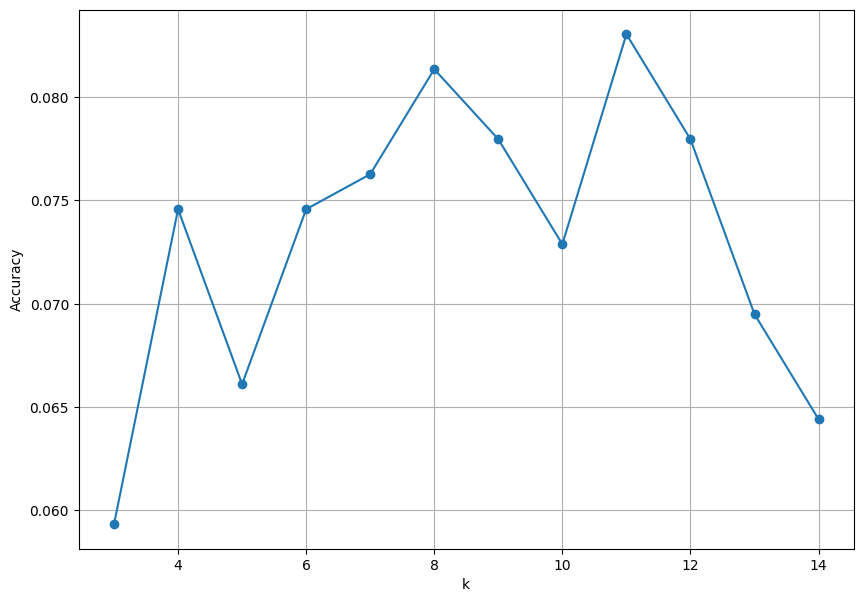

In [ ]:


plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:


knn_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:


knn_y_pred=knn_model.predict(x_test)

In [ ]:


print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNN Model:
Accuracy: 0.059322033898305086
              precision    recall  f1-score   support

           0       0.09      0.26      0.13        54
           1       0.01      0.03      0.02        31
           2       0.05      0.11      0.07        18
           3       0.03      0.05      0.03        19
           4       0.10      0.14      0.12        21
           5       0.11      0.21      0.15        14
           6       0.07      0.05      0.06        19
           7       0.06      0.11      0.08        38
           8       0.04      0.04      0.04        24
           9       0.00      0.00      0.00        18
          10       0.03      0.03      0.03        32
          11       0.00      0.00      0.00        17
          12       0.08      0.05      0.06        40
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        19
          16       0.00      0.00      

In [ ]:

from sklearn.naive_bayes import GaussianNB


In [ ]:


gnb_model = GaussianNB()

In [ ]:



gnb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:


gnb_y_pred = gnb_model.predict(x_test)

In [ ]:


print("GNB Model:")
print("Accuracy:", accuracy_score(y_test, gnb_y_pred))
print(classification_report(y_test, gnb_y_pred))

GNB Model:
Accuracy: 0.08305084745762711
              precision    recall  f1-score   support

           0       0.11      0.33      0.17        54
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        14
           6       0.07      0.05      0.06        19
           7       0.06      0.16      0.09        38
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.12      0.05      0.07        19
          16       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV



In [ ]:


param_dist = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': list(np.arange(2, 11)),
    'min_samples_leaf': list(np.arange(1, 11)),
    'criterion': ['gini', 'entropy']
}

In [ ]:

dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:



random_search = RandomizedSearchCV( dt_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=42
)

In [ ]:



random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=42)

In [ ]:


best_params = random_search.best_params_
best_dt = random_search.best_estimator_

In [ ]:



print("Best parameters:", best_params)

Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'entropy'}


In [ ]:



predictions = best_dt.predict(x_test)

In [ ]:



print("Randomsearch Model:")
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Randomsearch Model:
Accuracy: 0.09661016949152543
              precision    recall  f1-score   support

           0       0.09      0.85      0.17        54
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        38
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        19
          16       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modellerin Kaydı

In [ ]:
import pickle
dosya ="RandomizedSearchCV"
pickle.dump(best_dt,open(dosya,'wb'))